***Ali Mehdipour-9721162221***

# Question1

In [ ]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt


In [ ]:
from google.colab import drive
s = drive.mount('/content/drive', force_remount=True)

Hotel_df = pd.read_csv('/content/drive/My Drive/DataMining_LAB_1401T1/dmba/Hotel_booking.csv')
Hotel_df.head()

Mounted at /content/drive


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


Text(0, 0.5, 'Number of people reserved')

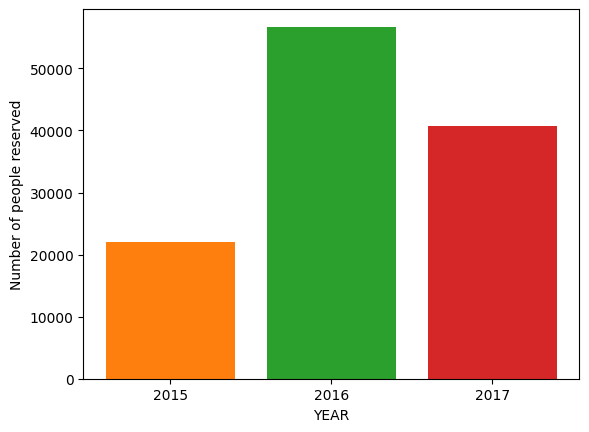

In [ ]:
dataForPlot = Hotel_df.groupby('arrival_date_year').count()['name']
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C1', 'C2','C3'])
ax.set_xticks([2015,2016,2017])
ax.set_xlabel('YEAR')
ax.set_ylabel('Number of people reserved')

توضیح: 
با توجه به نمودار میتوانیم به وضوح ببینیم که عملکرد هتل در سال 2016 بهتر از 2015 بوده و تعداد پذیرش ها بیشتر شده است. در مورد سال 2017 به صورت کامل نمیتوانیم نظر بدهیم چون چند ماه از این سال را فقط داده هایش را داریم

# Question2

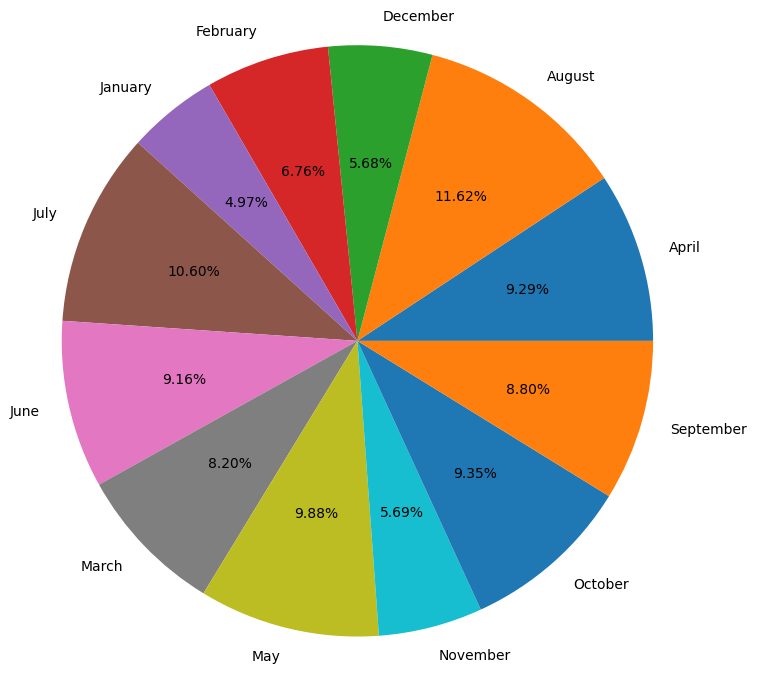

In [ ]:
data_of_month = Hotel_df.groupby('arrival_date_month').count()['name']
plt.pie(data_of_month, labels=data_of_month.index,autopct='%1.2f%%',radius=2)
plt.show() 

همانطور که از نمودار پیدا است ماه آگوست میلادی بهترین عملکرد هتل را نشان میدهد جایی که بیشترین درصد ثبت پذیرش را در خود جای داده است.
با این حال ماه هایی نظیر ژانویه و دسامبر کمترین درصد را به خود اختصاص داده اند.
هتل میتواند برای افزایش مشتری خود در این ماه ها تخفیف های ویژه یا امکانات اضافه تری نظیر سرو غذای رایگان و تور گردشگری داخل شهر و ... را در نظر بگیرد.

# Question3

In [ ]:
countries = Hotel_df.groupby('country').count()['name'].sort_values(ascending=False)
tops =countries.iloc[0:10]
new_row = pd.DataFrame(data = {
    'country' : ['OTHERS'],
    'value' : [countries[10:].sum()]
})
tops=pd.DataFrame({'country':tops.index, 'value':tops.values})
tops = pd.concat([tops,new_row])
tops.head(11)

,country,value
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


<function matplotlib.pyplot.show(close=None, block=None)>

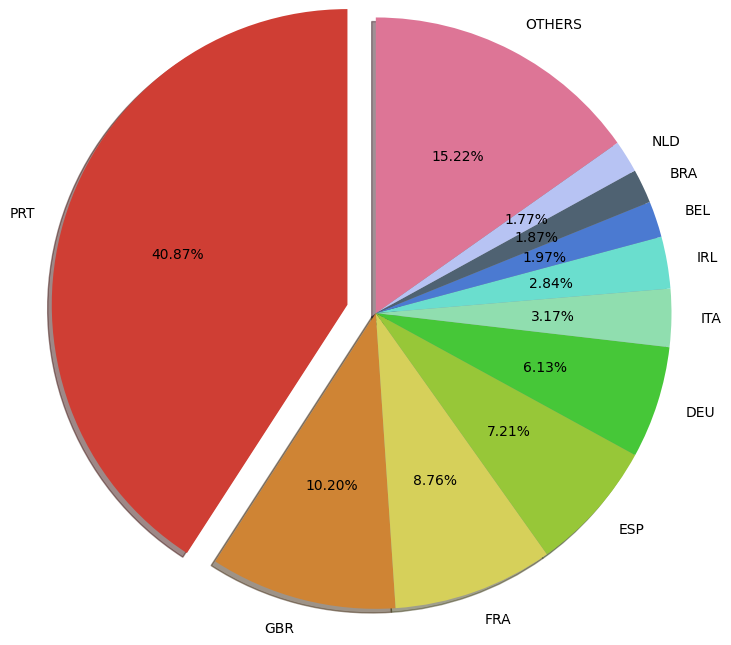

In [ ]:
colors = ['#cf3e34', '#cf8434', '#d6d05a', '#97c738','#46c738', '#90deaf', '#6adece', '#4b7ad1','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(tops['value'], labels=tops['country'],autopct='%1.2f%%',radius=2,shadow=True, startangle=90,explode=(0.2, 0, 0, 0,0,0,0,0,0,0,0),colors=colors)
plt.show

# Question4

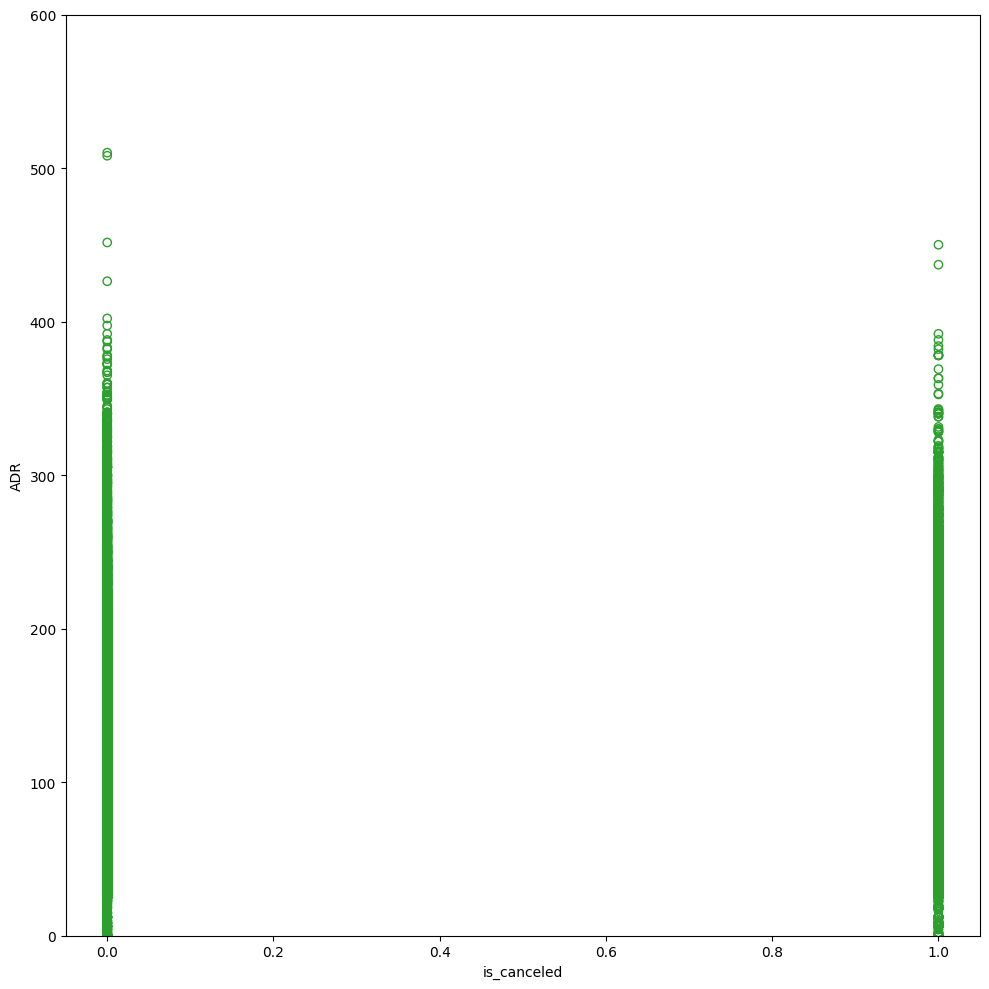

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.scatter(Hotel_df['is_canceled'], Hotel_df['adr'], color='C2', facecolor='none')
plt.xlabel('is_canceled')
plt.ylabel('ADR')
plt.ylim([0,600])
plt.tight_layout()
plt.show()

با توجه به نمودار و این که یکی از متغییر های ما به صورت کتگوریکال است میتوانیم بعضی از مفاهیم را برداشت کنیم:
بازه ی رزرو های کنسلی مقداری کمتر از بازه رزرو های کنسل نشده است . به این معنی توزیع داده در رزرو های کنسل شده مقدار کمتری از لحاظ نرخ هتل دارد.
همچنین میتوانیم ببینیم که تراکم رزرو های کنسل نشده در مقدار کم و زیاد بیشتر است

# Question5

In [ ]:
import seaborn as sns

In [ ]:
year = pd.to_datetime(Hotel_df['reservation_status_date']).dt.year
month = pd.to_datetime(Hotel_df['reservation_status_date']).dt.month
Hotel_df['new_year'] = year
Hotel_df['new_month'] = month
print(Hotel_df.shape)


(119390, 38)


<Axes: xlabel='new_year', ylabel='new_month'>

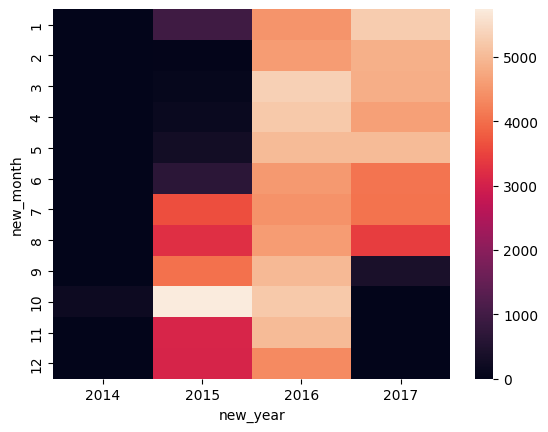

In [ ]:
df = Hotel_df.pivot_table(index="new_month",columns="new_year",values="name", aggfunc="count").fillna(0)
sns.heatmap(df)

با توجه به نمودار زیر میتوانیم بفهمیم که در ماه اکتبر سال 2015 بیشترین تعداد درخواست را داشته ایم .
به طور کلی میبینیم که سال 2016 به دلیل کمرنگ تر بودن هیت مپ در آن بازه عملکرد بهتری نسبت به دیگر سال ها داشته است.
میبینیم که عملکرد هتل در ماه 5 سال های 2016 و 2017 تقریبا یکی بوده.
میبینیم که در ماه 1 سال 2017 عملکرد بهتری نسبت به ماه 1 در سال 2016 داشته و ...